# Schelling's model of segregation

In [6]:
import math
import random

class Agent:
    def __init__(self, type, n):
        self.ag_type = type
        self.location = random.randint(1, n), random.randint(1, n)
        self.satisf = None

    def get_location(self):
        return self.location

    def get_type(self):
        return self.ag_type

    def get_distance(self, agent):
        return (math.pow((self.location[0] - agent.location[0]), 2) + math.pow((self.location[1] - agent.location[1]),
                                                                               2))

    """  def satisfaction(self, agents):
      cnt = 0
      for agent in agents:
        if self.get_distance(agent) < 2:
          if self.type == agent.type:
            cnt += 1
      return cnt / 8"""

    def satisfaction(self, agent):
        if self.ag_type == agent.get_type():
            return 1
        return 0

    def change_satisf(self, status):
        self.satisf = status

    def change_location(self, n):
        self.location = random.randint(1, n), random.randint(1, n)

    def generate_location(self, n):
        return random.randint(1, n), random.randint(1, n)

    def set_location(self, x, y):
        self.location = x, y

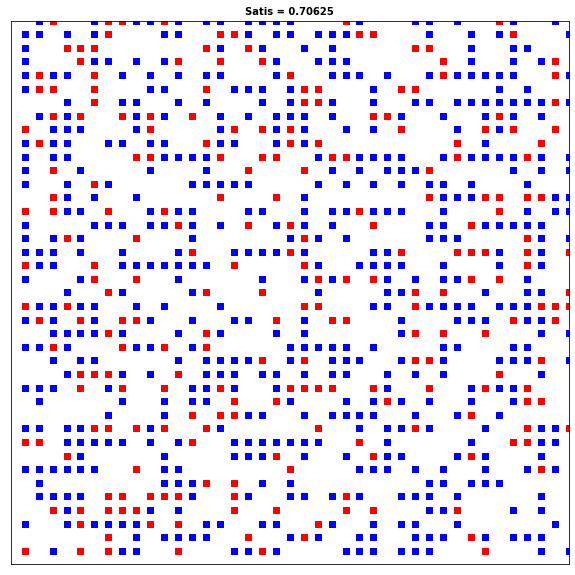

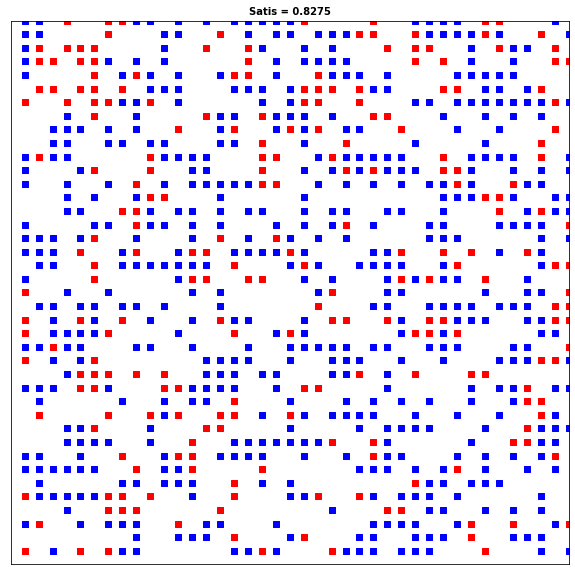

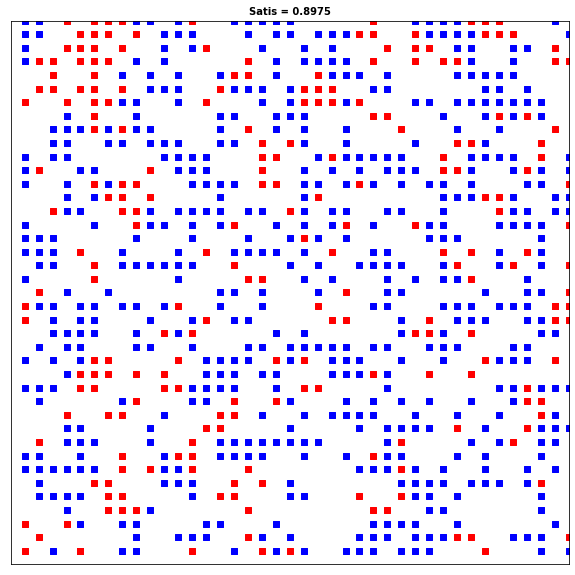

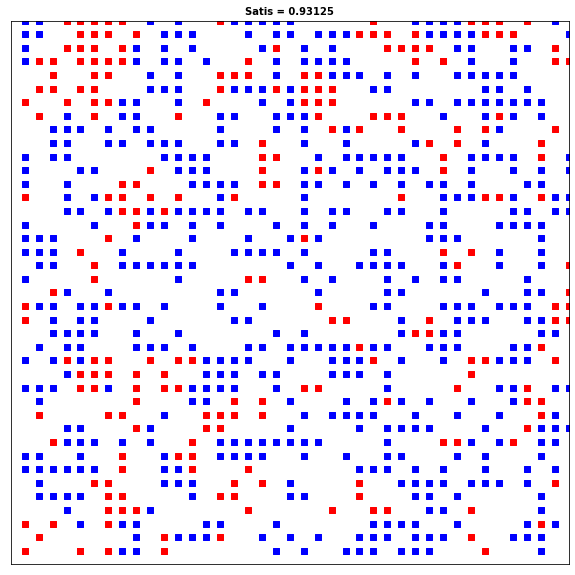

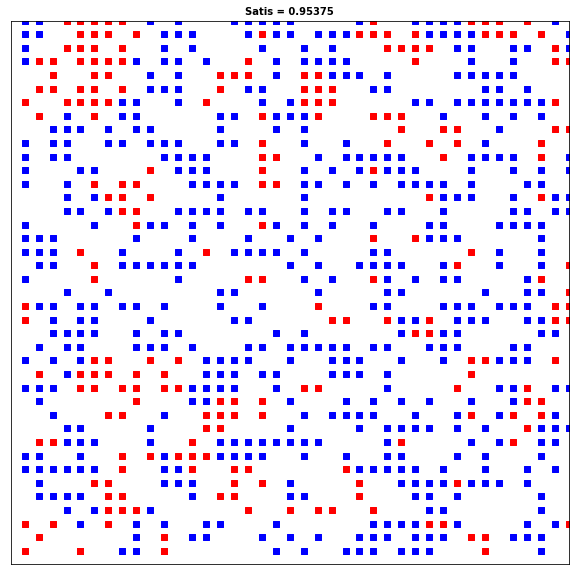

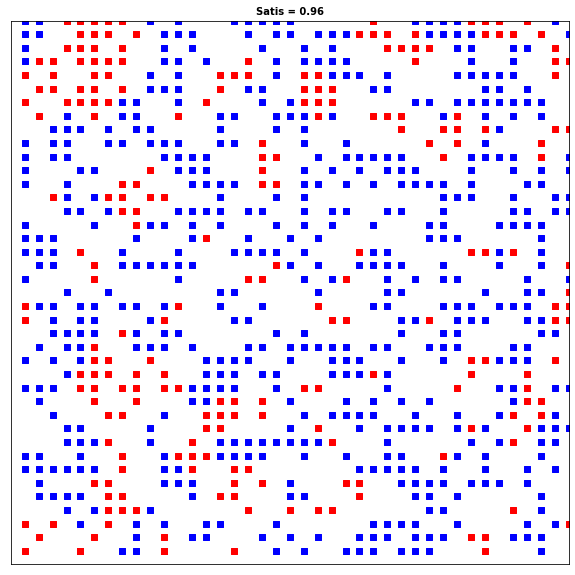

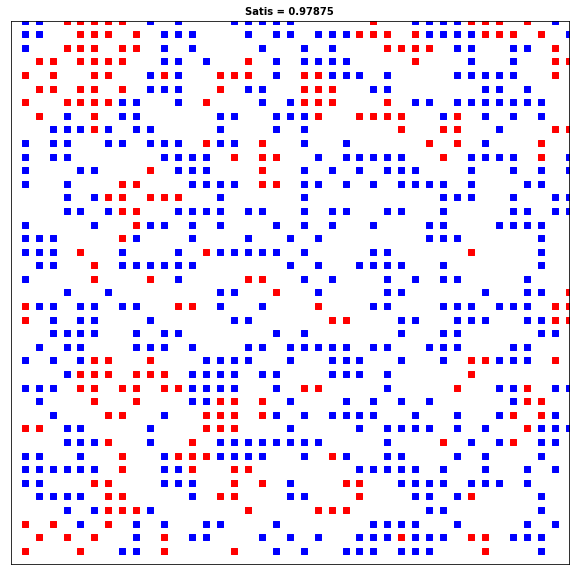

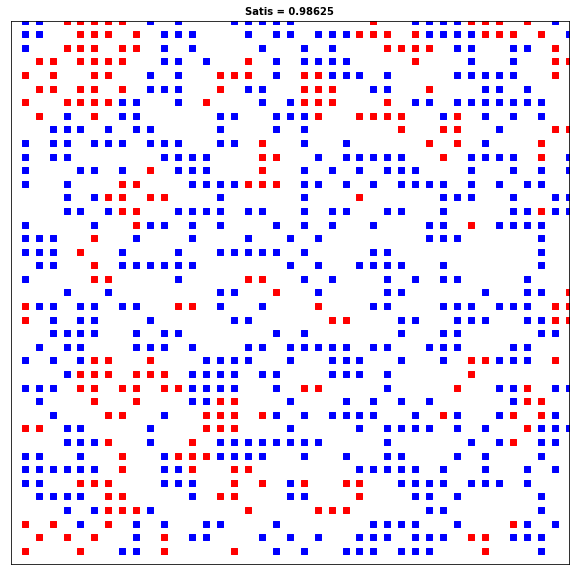

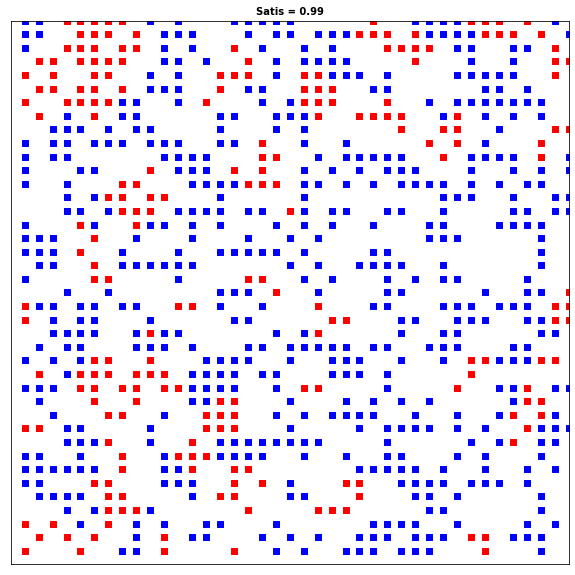

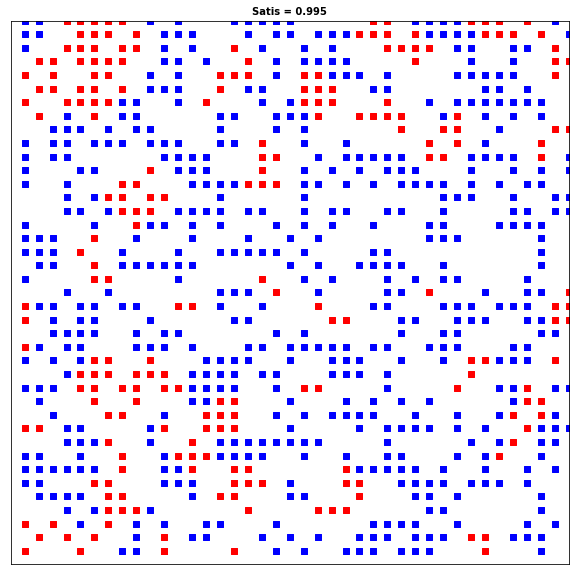

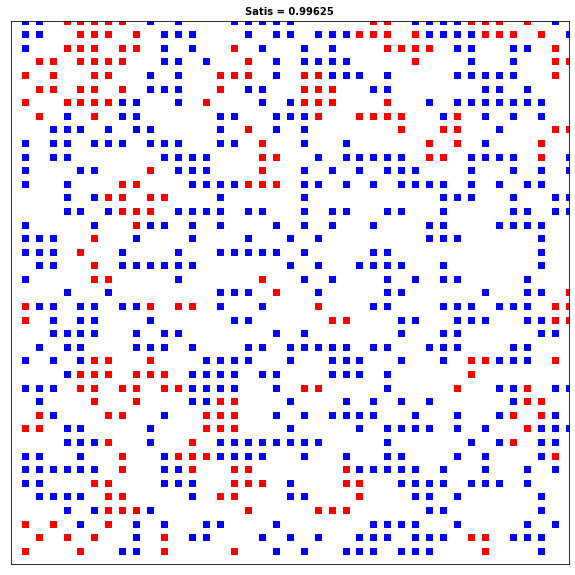

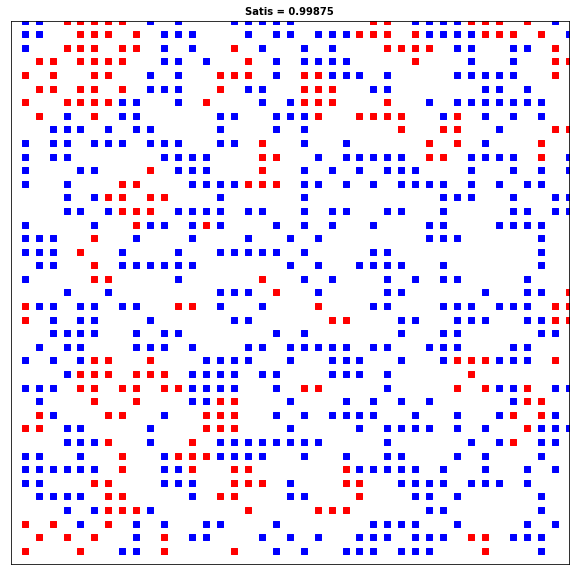

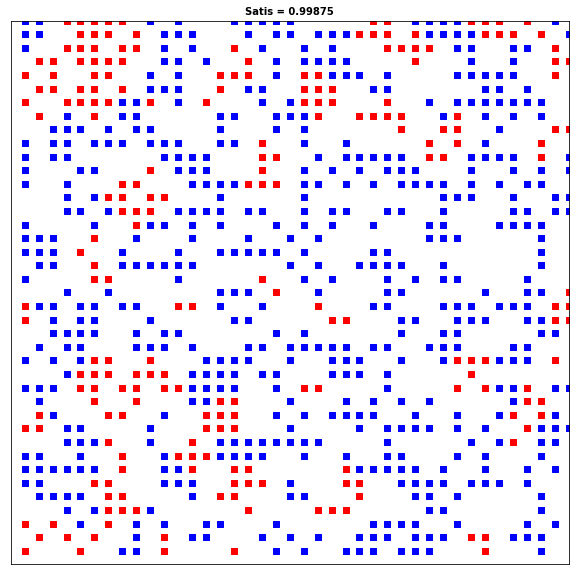

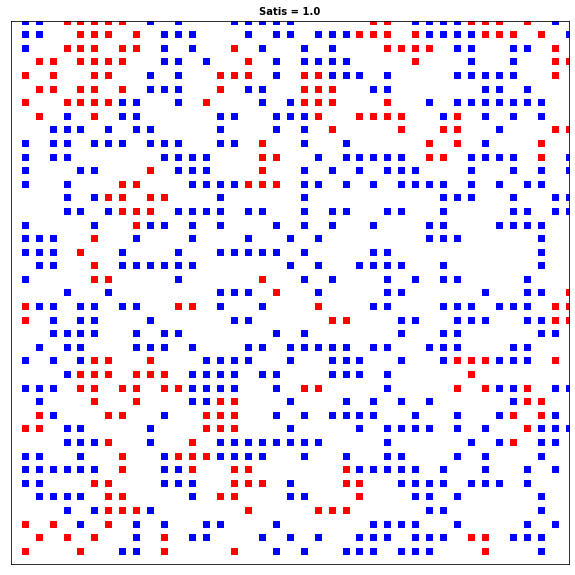

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time


# params initialization
n = 40
ratio = 0.7
tot_size = n * n
sat = 0.4
empty = 0.5 
emp = int(tot_size * empty)
a_num = int((tot_size - emp) * ratio)
b_num =  int((tot_size - emp) * (1-ratio))


# create matrix
def create_field(n):
    agent_matrix = [-1] * (n + 2)
    for i in range(n + 2):
      agent_matrix[i] = [-1] * (n + 2)
    return agent_matrix

agent_matrix = create_field(n)
agents = []
    

# agent initialization
def init_agents(agents, num, type, agent_matrix):
    for i in range(num):
        ag = Agent(type, n)
        agents.append(ag)
        loc = ag.get_location()
        while (agent_matrix[loc[0]][loc[1]] != -1):
            ag.change_location(n)
            loc = ag.get_location()
        agent_matrix[loc[0]][loc[1]] = ag

    return agent_matrix, agents


agent_matrix = create_field(n)
agents = []

agent_matrix, agent = init_agents(agents, a_num, 0, agent_matrix)
agent_matrix, agent = init_agents(agents, b_num, 1, agent_matrix)


# each iteration plotting
def plot(ag0, ag1, title):

    fig, ax = plt.subplots(figsize=(10,10))
    agent_colors = {1:'b', 0:'r'}

    x0, y0 = zip(*ag0)
    x1, y1 = zip(*ag1)
    ax.scatter(x0, y0, color='b', marker='s')
    ax.scatter(x1, y1, color='r', marker='s')
    ax.set_title(f'Satis = {title}', fontsize=10, fontweight='bold')
    ax.set_xlim([0, n])
    ax.set_ylim([0, n])
    ax.set_xticks([])
    ax.set_yticks([])
    # plt.savefig(file_name)
    # plt.savefig('/content/drive/My Drive/skoltech/sc/project/plot.png')
    plt.show()
    plt.close()
    #fig.canvas.draw_idle()


# iterations with model
def model(agents, agent_matrix):
    changes = 1
    while changes != 0:
      #plt_dynamic(agents)
      changes = 0
      cnt_sat = 0
      agent_matrix_new = create_field(n)
      agents_new = []
      ag1 = []
      ag0 = []
      for agent in agents:
        loc = agent.get_location()

        if agent.get_type() == 0:
          ag0.append(loc)
        else:
          ag1.append(loc)

        res = 0
        cnt_neib = 8
        neigbors = [agent_matrix[loc[0] - 1][loc[1] - 1], agent_matrix[loc[0] - 1][loc[1]], agent_matrix[loc[0] - 1][loc[1] + 1], agent_matrix[loc[0]][loc[1] - 1], agent_matrix[loc[0]][loc[1] +1], agent_matrix[loc[0] + 1][loc[1] - 1], agent_matrix[loc[0] + 1][loc[1]], agent_matrix[loc[0] + 1][loc[1] + 1]]
        for neib in neigbors:
          if neib == -1:
            cnt_neib -= 1
            continue
          res += agent.satisfaction(neib)
        if (cnt_neib > 0 and res / cnt_neib >= sat) or cnt_neib == 0:
          agent.satisf = 'Yes'
          cnt_sat += 1
          agent_matrix_new[loc[0]][loc[1]] = agent
        else:
          agent.satisf = 'No'
          agent.change_location(n)
          loc = agent.get_location()
          while (agent_matrix_new[loc[0]][loc[1]] != -1):
            agent.change_location(n)
            loc = agent.get_location()
          agent_matrix_new[loc[0]][loc[1]] = agent
          changes = 1

        agents_new.append(agent)
      
      plot(ag0, ag1, cnt_sat /len(agents))

      agents = agents_new
      agent_matrix = agent_matrix_new
      # changes = check(agents_new)
      # print(changes)

model(agents, agent_matrix)